# Plotting and Saving Figures in Matplotlib

### *Copyright 2021-2022 Dr. George Papagiannakis,  papagian@csd.uoc.gr*
*All Rights Reserved*
### *University of Crete & Foundation for Research & Technology - Hellas (FORTH)*

This notebook is also based on parts of [Lectures on scientific computing with Python](http://github.com/jrjohansson/scientific-python-lectures) by [J.R. Johansson](http://jrjohansson.github.io). 

---

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

In [2]:
x = np.linspace(0, 10, 10) #Returns 10 evenly spaced samples, calculated over the interval [0, 5].
y = x ** 2
print(x), print(y)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
[  0.           1.2345679    4.9382716   11.11111111  19.75308642
  30.86419753  44.44444444  60.49382716  79.01234568 100.        ]


(None, None)

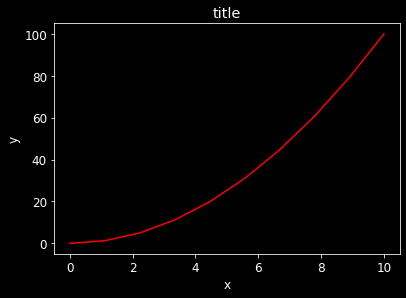

In [3]:
fig = plt.figure()

# Restoring font size.
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

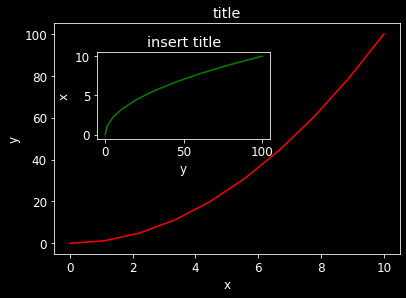

In [4]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

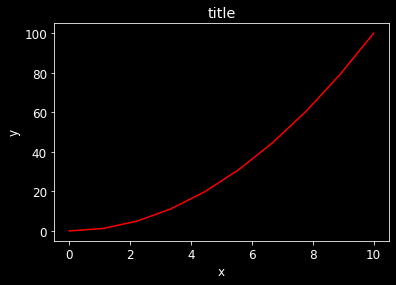

In [5]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

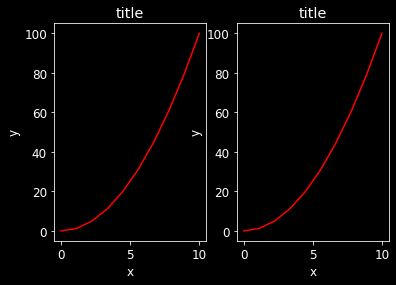

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

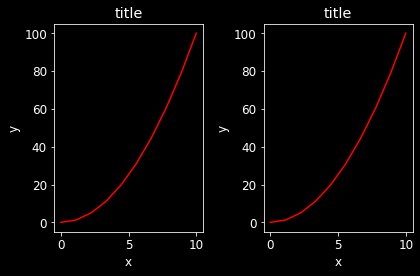

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

## Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [8]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

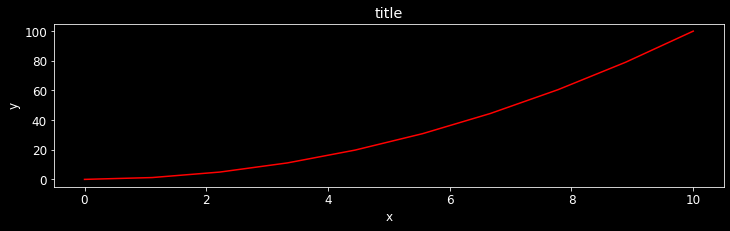

In [9]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [10]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [11]:
fig.savefig("filename.png", dpi=200)

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command). In some cases, PGF can also be good alternative.

## Further reading

* Check out more introductory notebooks in **Juno**!
* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.


## Versions

In [12]:
%reload_ext version_information
%version_information numpy, matplotlib

ModuleNotFoundError: No module named 'version_information'